## Full model cross-lingual representation similarity

Similarity of full vs full model one language:
- take finetuned model representation of english, full model representation of english
- over layers, compute CKA scores
- do this for a english and other language pairs

In [1]:
%load_ext autoreload
%autoreload 2

# Change working directory to root of the repo
import os

print(os.getcwd())
os.chdir("..")
os.getcwd()

/home/paulius/projects/cross-lingual-subnetworks/scripts


'/home/paulius/projects/cross-lingual-subnetworks'

In [2]:
from cross_lingual_subnets.visualization import load_encodings

PATH_TO_SUB_ENCODINGS = "encodings_50/"
PRUNED_PCTG = PATH_TO_SUB_ENCODINGS.split("_")[1][:-1]
PATH_TO_FULL_ENCODINGS = "encodings_full/"
full_sub = load_encodings(
    path_to_sub_encodings=PATH_TO_SUB_ENCODINGS,
    path_to_full_encodings=PATH_TO_FULL_ENCODINGS,
    max_length=None,
)

In [3]:
# Fake encodings for debugging
# import torch

# full_sub = {
#     "en": {
#         "base": {i: torch.randn(10, 500) for i in range(12)},
#         "finetuned": {i: torch.randn(10, 500) for i in range(12)},
#         "sub": {i: torch.randn(10, 500) for i in range(12)},
#     },
#     "es": {
#         "base": {i: torch.randn(10, 500) for i in range(12)},
#         "finetuned": {i: torch.randn(10, 500) for i in range(12)},
#         "sub": {i: torch.randn(10, 500) for i in range(12)},
#     },
#     "de": {
#         "base": {i: torch.randn(10, 500) for i in range(12)},
#         "finetuned": {i: torch.randn(10, 500) for i in range(12)},
#         "sub": {i: torch.randn(10, 500) for i in range(12)},
#     },
# }

In [4]:
import matplotlib.pyplot as plt

font_config = {"size": 14}
plt.rc("font", **font_config)

In [5]:
# from cross_lingual_subnets.visualization import cka_cross_layer

# # Sanity check: is the same model similar to itself?
# cka_cross_layer(
#     full_sub["en"]["base"],
#     full_sub["en"]["base"],
#     xlabel="base",
#     ylabel="base",
# )

In [6]:
# TODO: do a random initialization of the same vectors to compare?
# TODO: compare subnetworks between languages
# TODO: if we compare models - we are investigating the quality of the pruning process - if the representations are similar, that's good!
# TODO: if we compare languages - (assuming pruning is OK) we are investigating the language sharing mechanism - if the representations are similar, the subnetworks are similar and they are not very language-specific
#

In [7]:
# cka_cross_layer(
#     full_sub["en"]["base"],
#     full_sub["en"]["finetuned"],
#     xlabel="Base",
#     ylabel="Finetuned",
#     savename=f"cka_base_vs_finetuned.pdf",
# )

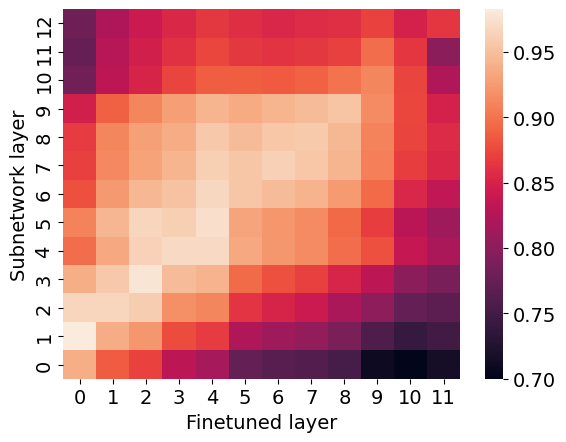

In [8]:
from cross_lingual_subnets.visualization import cka_cross_layer

cka_cross_layer(
    full_sub["en"]["finetuned"],
    full_sub["en"]["sub"],
    xlabel="Finetuned",
    ylabel="Subnetwork",
    savename=f"cka_en_full_vs_{PRUNED_PCTG}_sub.pdf",
)

## Heatmaps of representations base vs finetuned models for different languages

In [9]:
# from cross_lingual_subnets.visualization import cka_cross_layer_all_languages

# cka_cross_layer_all_languages(
#     full_sub=full_sub,
#     xlabel="Base",
#     ylabel="Finetuned",
#     exp_name1="base",
#     exp_name2="finetuned",
#     savename=f"cka_base_vs_finetuned_all_langs.pdf",
# )

/home/paulius/projects/cross-lingual-subnetworks/cross_lingual_subnets/visualization.py:186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 0.9, 1])


,0,1,2,3,4,5,6,7,8,9,10,11
12,0.776262,0.629834,0.694055,0.735884,0.742276,0.752513,0.748840,0.754443,0.754801,0.717798,0.733790,0.781981
11,0.780163,0.657631,0.733114,0.766404,0.764392,0.766144,0.774143,0.772537,0.775858,0.765248,0.788307,0.726413
10,0.833633,0.709300,0.792086,0.830543,0.832107,0.839196,0.847830,0.847684,0.846323,0.823119,0.835431,0.793764
9,0.858471,0.745812,0.830624,0.866405,0.873474,0.876823,0.888151,0.887000,0.882779,0.853542,0.859836,0.809655
8,0.878244,0.762632,0.851424,0.883422,0.885676,0.884809,0.896283,0.890423,0.881867,0.863899,0.871920,0.808006
7,0.884635,0.777489,0.869290,0.899166,0.900880,0.897412,0.912355,0.899012,0.888996,0.876782,0.882192,0.806068
6,0.904188,0.788067,0.879582,0.908524,0.910396,0.905997,0.912821,0.898874,0.885689,0.865297,0.869768,0.810250
5,0.901247,0.795912,0.887330,0.913036,0.914243,0.900635,0.907811,0.891896,0.877860,0.857482,0.862419,0.798515
4,0.908924,0.798156,0.888545,0.920374,0.921865,0.912409,0.915661,0.902019,0.889283,0.862642,0.867963,0.817535
3,0.927280,0.813861,0.899217,0.918776,0.920087,0.908164,0.914269,0.898722,0.885503,0.860511,0.864581,0.814283


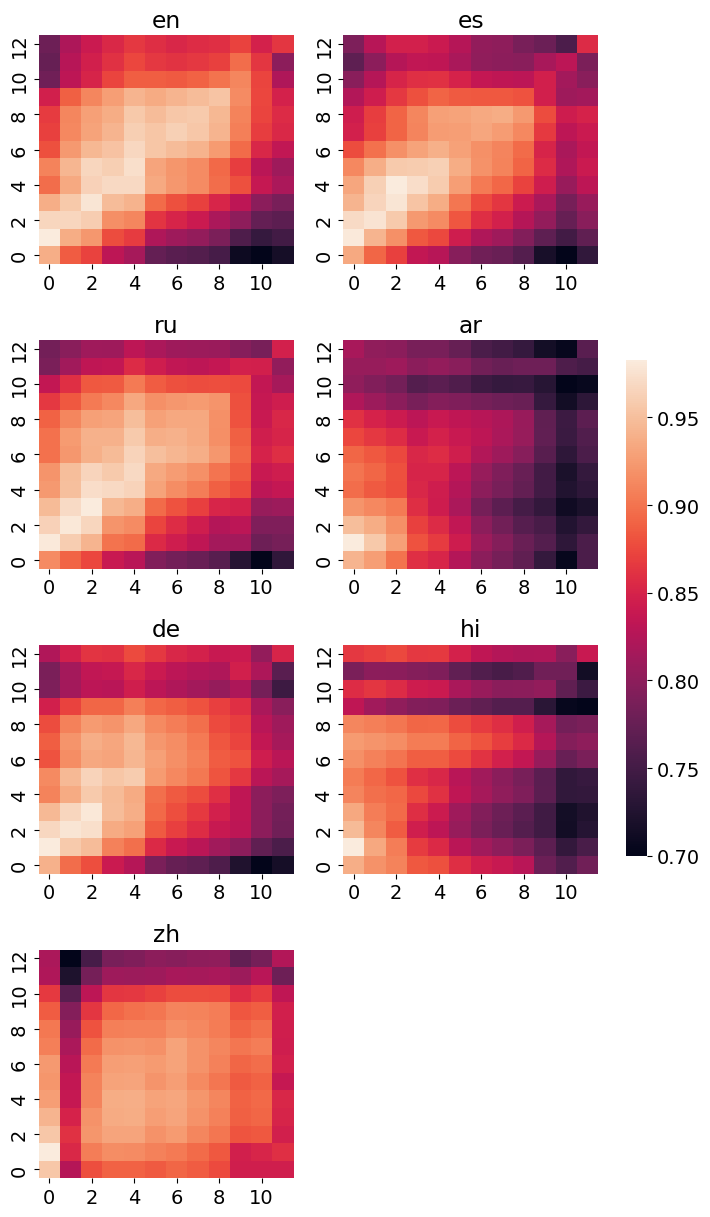

In [10]:
from cross_lingual_subnets.visualization import cka_cross_layer_all_languages

cka_cross_layer_all_languages(
    full_sub=full_sub,
    xlabel="Full",
    ylabel="Subnetwork",
    exp_name1="finetuned",
    exp_name2="sub",
    savename=f"cka_full_vs_{PRUNED_PCTG}_sub_all_langs.pdf",
)

In [11]:
# cka_cross_layer_all_languages(
#     full_sub=full_sub,
#     xlabel="Full",
#     ylabel="Subnetwork",
#     exp_name1="sub",
#     exp_name2="sub",
#     savename=f"cka_{PRUNED_PCTG}_sub_vs_sub_all_langs.pdf",
# )

## Lineplots for comparing representations of same languages but different models per layers

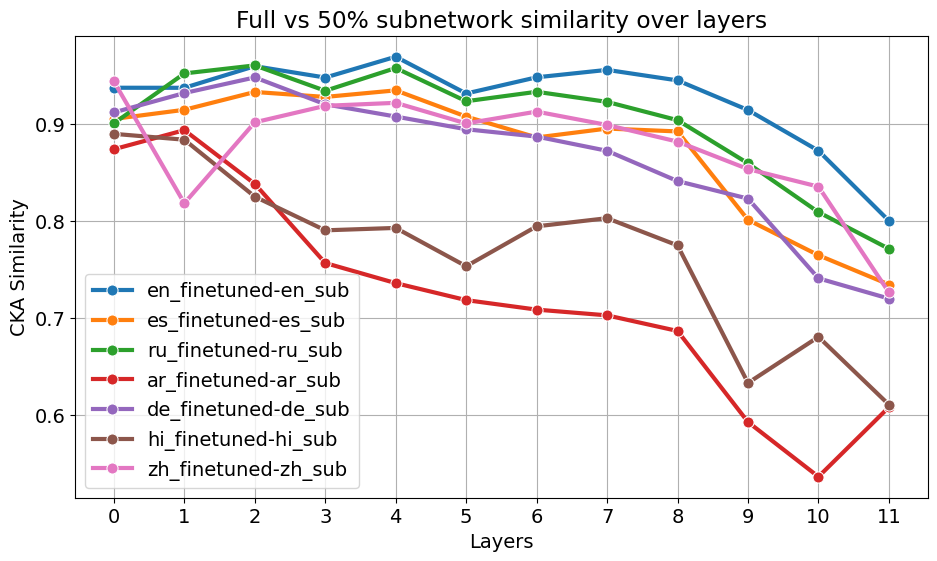

In [12]:
from cross_lingual_subnets.visualization import cka_layer_by_layer

full_sub_same_layer_df = cka_layer_by_layer(
    full_sub=full_sub,
    exp_name1="finetuned",
    exp_name2="sub",
    source=None,
    savename=f"cka_full_vs_{PRUNED_PCTG}_sub_same_langs.pdf",
    legend=True,
    title=f"Full vs {PRUNED_PCTG}% subnetwork similarity over layers",
    figsize=(11, 6),
)
full_sub_same_layer_df.to_csv(f"full_{PRUNED_PCTG}_sub_same_layer.csv", index=False)

## Similarity scores over layers for different languages

In [13]:
# from cross_lingual_subnets.visualization import cka_layer_by_layer

# full_full_df = cka_layer_by_layer(
#     full_sub=full_sub,
#     exp_name1="finetuned",
#     exp_name2="finetuned",
#     source="en",
#     savename=f"cka_en_other_langs_full_vs_full.pdf",
#     legend=True,
#     title="Full model cross-lingual representation similarity over layers",
# )
# full_full_df.to_csv(f"full_full_df.csv", index=False)

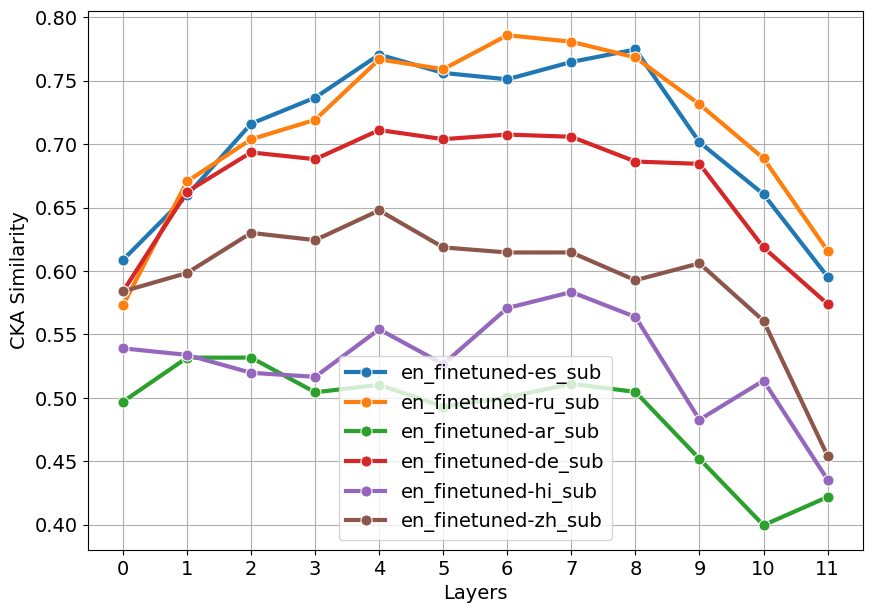

In [14]:
full_sub_df = cka_layer_by_layer(
    full_sub=full_sub,
    exp_name1="finetuned",
    exp_name2="sub",
    source="en",
    savename=f"cka_en_other_langs_full_vs_{PRUNED_PCTG}_sub.pdf",
    legend=True,
    # title="Subnetwork cross-lingual representation similarity over layers",
)
full_sub_df.to_csv(f"full_{PRUNED_PCTG}_sub_df.csv", index=False)

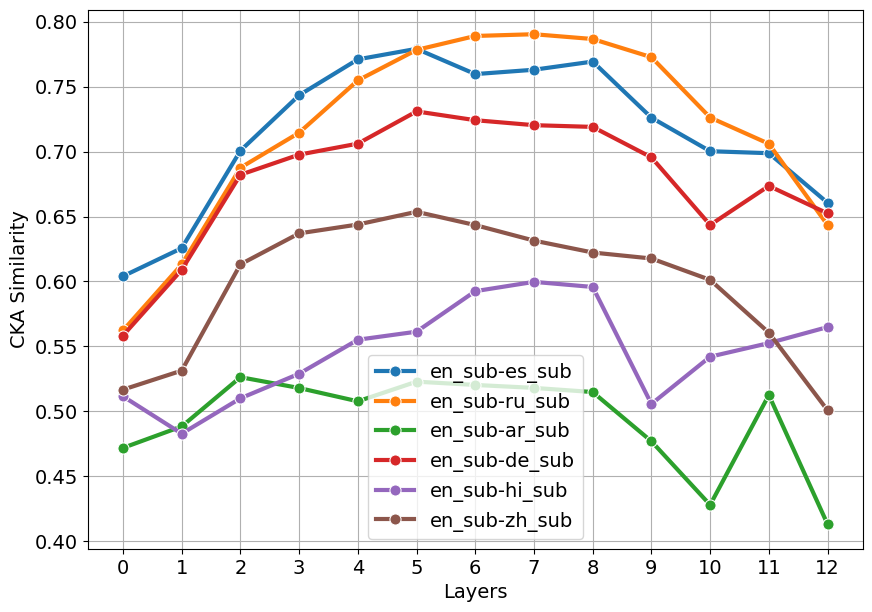

In [15]:
sub_sub_df = cka_layer_by_layer(
    full_sub=full_sub,
    exp_name1="sub",
    exp_name2="sub",
    source="en",
    savename=f"cka_{PRUNED_PCTG}_en_sub_other_langs_sub.pdf",
    legend=True,
    # title="Subnetwork cross-lingual representation similarity over layers",
)
sub_sub_df.to_csv(f"{PRUNED_PCTG}_sub_sub_df.csv", index=False)

## Barplots of differences of similarity

In [16]:
import pandas as pd


def compute_diff_df(df1, df2):
    diff_df = (df1.to_numpy() - df2.to_numpy()).T

    new_df = pd.DataFrame()
    for i, col in enumerate(full_sub_df):
        colname = col.replace("_finetuned", "").replace("_sub", "")
        new_df[colname] = diff_df[i]

    return new_df

In [28]:
full_full_df = pd.read_csv("full_full_df.csv")
full_full_df = full_full_df.drop("Unnamed: 0", axis=1)
new_df = compute_diff_df(full_full_df, full_sub_df)

[2024-05-30 15:21:05,504] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-05-30 15:21:05,514] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-05-30 15:21:05,607] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-05-30 15:21:05,619] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to

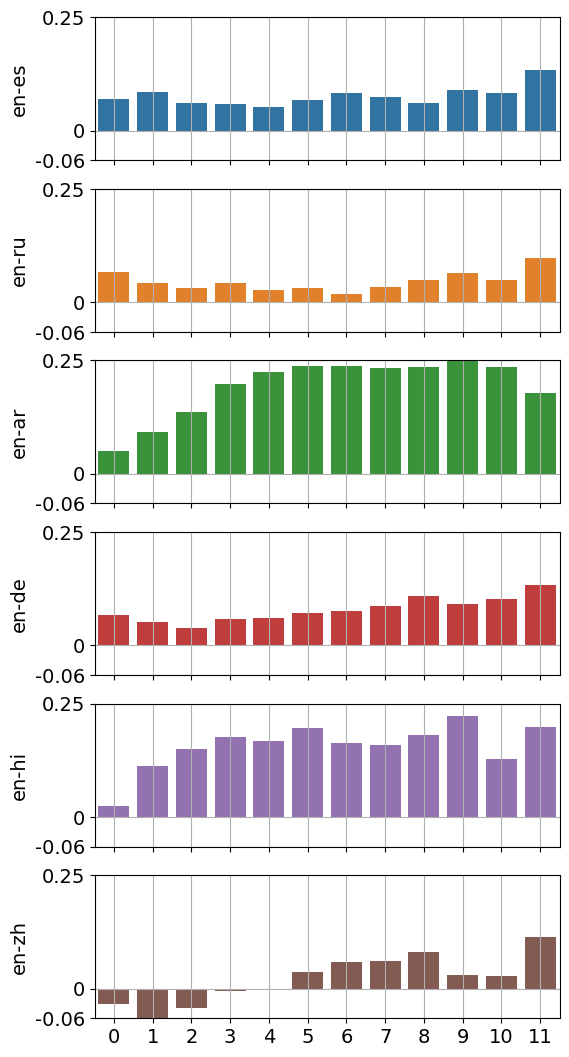

In [29]:
from cross_lingual_subnets.visualization import cka_diff_barplots

cka_diff_barplots(
    new_df.T,
    savename=f"cka_{PRUNED_PCTG}_full_sub_difference_barplots.pdf",
    figsize=(6, 13),
)

In [36]:
sub_sub_df = sub_sub_df.drop(0).reset_index().drop("index", axis=1)

In [37]:
new_df2 = compute_diff_df(full_full_df, sub_sub_df)

[2024-05-30 15:23:00,542] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-05-30 15:23:00,549] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-05-30 15:23:00,640] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-05-30 15:23:00,650] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to

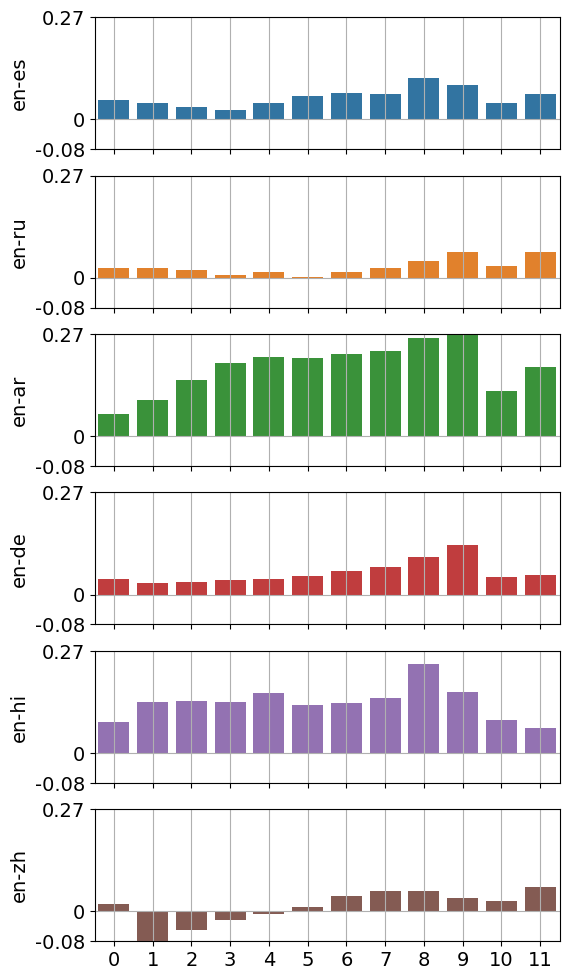

In [38]:
cka_diff_barplots(
    new_df2.T,
    savename=f"cka_{PRUNED_PCTG}_sub_difference_barplots.pdf",
    figsize=(6, 12),
)